In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [74]:
df = pd.read_csv('/content/data.csv')
print('Shape:', df.shape)
df.head(15)

Shape: (3705, 18)


,name,country,date,trip_verified,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,value_for_money,recommended
0,F Orlandino,United Kingdom,2023-12-03,Trip Verified,1.0,NaN,Family Leisure,Economy Class,Palma de Mallorca to Gatwick,December 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no
1,A Gittens,United Kingdom,2023-11-30,Trip Verified,5.0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,November 2023,2.0,3.0,3.0,1.0,4.0,1.0,3,yes
2,Bert Vissers,Switzerland,2023-11-26,Trip Verified,1.0,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,July 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no
3,E Smyth,United Kingdom,2023-11-23,Trip Verified,9.0,A380,Couple Leisure,First Class,London to Miami,November 2023,5.0,5.0,5.0,5.0,4.0,2.0,4,yes
4,L Keele,Germany,2023-11-19,Trip Verified,1.0,NaN,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no
5,Austin Jones,United States,2023-11-19,Trip Verified,3.0,A320,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,1.0,2.0,2,no
6,M A Collie,Ireland,2023-11-16,Not Verified,8.0,A320,Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,NaN,4.0,NaN,3,yes
7,Nigel Dean,Australia,2023-11-16,Trip Verified,1.0,NaN,Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,NaN,NaN,1.0,NaN,1,no
8,Gaylynne Simpson,United States,2023-11-14,Not Verified,1.0,NaN,Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no
9,A Narden,Romania,2023-11-12,Trip Verified,1.0,A320,Solo Leisure,Economy Class,Bucharest to Manchester via London,September 2023,1.0,1.0,1.0,1.0,1.0,NaN,1,no


In [75]:
df.describe()

,rating,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,value_for_money
count,3698.000000,3589.000000,3578.000000,3319.000000,2564.000000,2859.000000,612.000000,3705.000000
mean,4.716333,2.868208,3.247624,2.705032,2.637676,2.783841,1.921569,2.682591
std,3.169345,1.360235,1.489935,1.436859,1.403468,1.457157,1.350417,1.469886
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


No     2210
Yes    1495
Name: recommended, dtype: int64


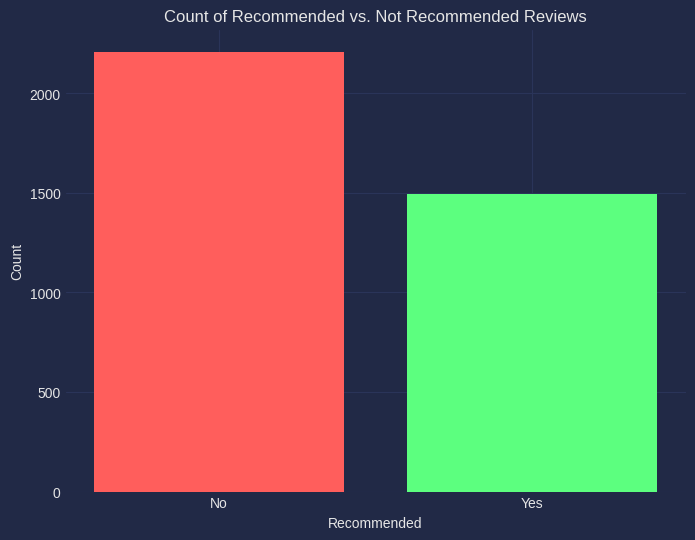

In [76]:
recommended_counts = df['recommended'].str.capitalize().value_counts()
print(recommended_counts)

# Bar chart-To visualize type of recommendations
plt.figure(figsize=(8, 6))
plt.bar(recommended_counts.index, recommended_counts.values, color=['#ff5e5c', '#5cff7f'])

# Titiles and Labels
plt.title('Count of Recommended vs. Not Recommended Reviews')
plt.xlabel('Recommended')
plt.ylabel('Count')

plt.show()

In [77]:
# Convert 'Yes' and 'No' to 1 and 0
df['recommended'] = df['recommended'].map({'Yes': 1, 'No': 0})

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Create a new column 'combined_country' to represent the combined countries
df['combined_country'] = df['country'].apply(lambda x: x if x in ['United States', 'United Kingdom', 'Canada', 'Australia', 'Germany'] else 'Other')

# Update 'recommended' column based on 'rating'
df['recommended'] = df.apply(lambda row: 'Yes' if row['rating'] >= 5
                             and pd.isna(row['recommended'])
                             else 'No' if row['rating'] < 5
                             and pd.isna(row['recommended'])
                             else row['recommended'], axis=1)

# Create recommendation counts for the combined countries
recommendation_counts = df.groupby(['combined_country', 'recommended']).size().unstack().fillna(0)
print(recommendation_counts)

# Order countries by highest review count
order = recommendation_counts.sum(axis=1).sort_values(ascending=False).index
recommendation_counts = recommendation_counts.loc[order]

recommended         No   Yes
combined_country            
Australia           94    63
Canada              63    52
Germany             42    22
Other              291   336
United Kingdom    1206  1112
United States      261   156


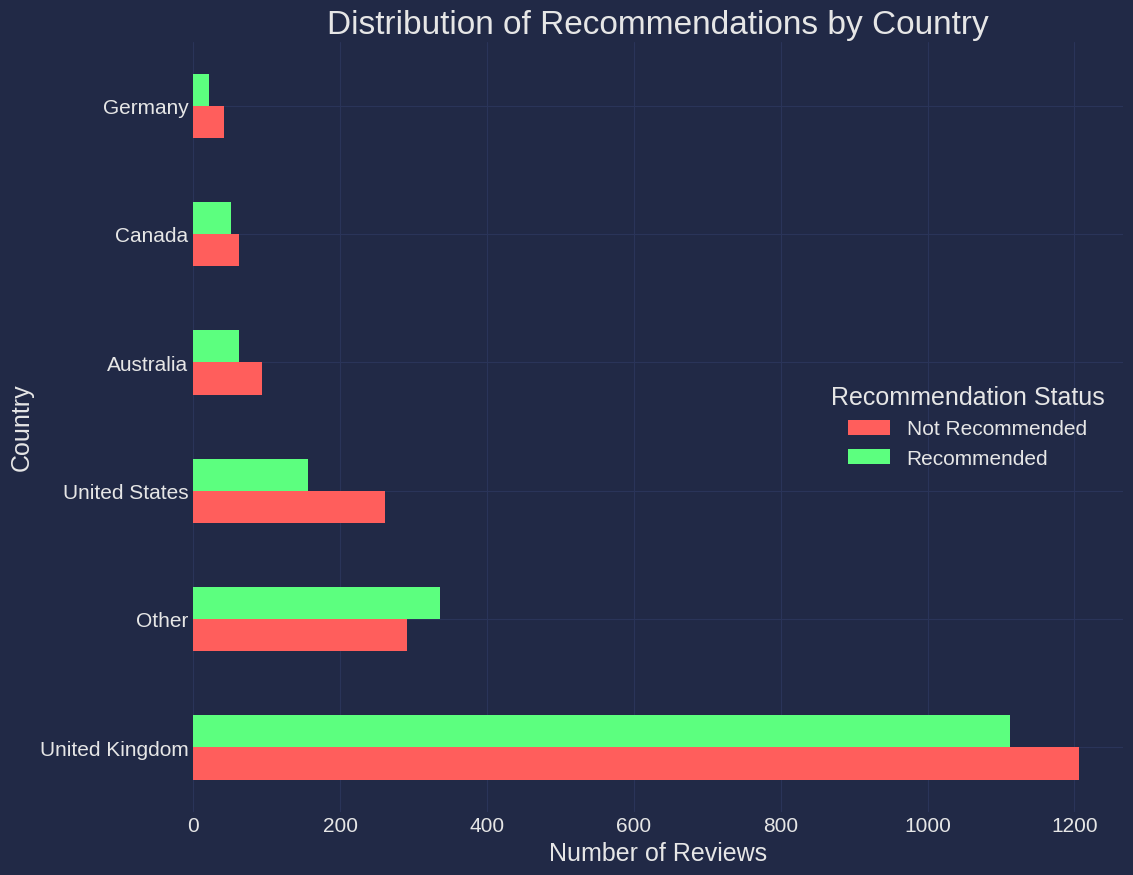

In [78]:
# Plot a horizontal bar chart with red and green bars
ax = recommendation_counts.plot(kind='barh', color=['#ff5e5c', '#5cff7f'], figsize=(12, 10))

# Set labels and title
ax.set_xlabel('Number of Reviews', fontsize=18)
ax.set_ylabel('Country', fontsize=18)
ax.set_title('Distribution of Recommendations by Country', fontsize=24)

# Set the legend title and labels, move legend to bottom left
legend_labels = ['Not Recommended', 'Recommended']
legend_title = 'Recommendation Status'
plt.legend(legend_labels, title=legend_title, loc='center right', title_fontsize=18, fontsize=15)

# Increase font size of tick labels
ax.tick_params(axis='both', labelsize=15)

plt.show()

# Drop the temporary 'combined_country' column to not affect the original DataFrame
df = df.drop('combined_country', axis=1)

In [79]:
# Filter out rows where 'aircraft' is None
df = df[df['aircraft'].notna()]

# Group similar aircraft types dynamically
df['aircraft_group'] = df['aircraft'].apply(lambda x: x if df['aircraft'].value_counts().loc[x] > 5 else 'Other')

# Create a bar chart to visualize the distribution of recommendations for each grouped aircraft type
recommendation_counts = df.groupby(['aircraft_group', 'recommended']).size().unstack().fillna(0)

# Order aircraft groups by highest review count
order = recommendation_counts.sum(axis=1).sort_values(ascending=False).index
recommendation_counts = recommendation_counts.loc[order]
print(recommendation_counts)

recommended         No  Yes
aircraft_group             
A320               176  190
Boeing 777         152  121
Other               90  161
Boeing 747-400      86   96
A380                66  101
Boeing 777-200      50   75
A319                49   60
Boeing 747          51   34
A321                36   44
Boeing 787          24   43
Boeing 767          22   19
Boeing 787-9        14   25
Boeing 777-300      17   20
A350                 8    8
Boeing 777-300ER     1   12
Boeing 787-8         4    7
A321neo              7    3
A380-800             5    4
Boeing 777-200ER     1    8
Boeing 747 400       3    5
A320-200             2    5
Boeing 787-900       2    5
Boeing 737           2    4
Boeing 787 / A320    1    5


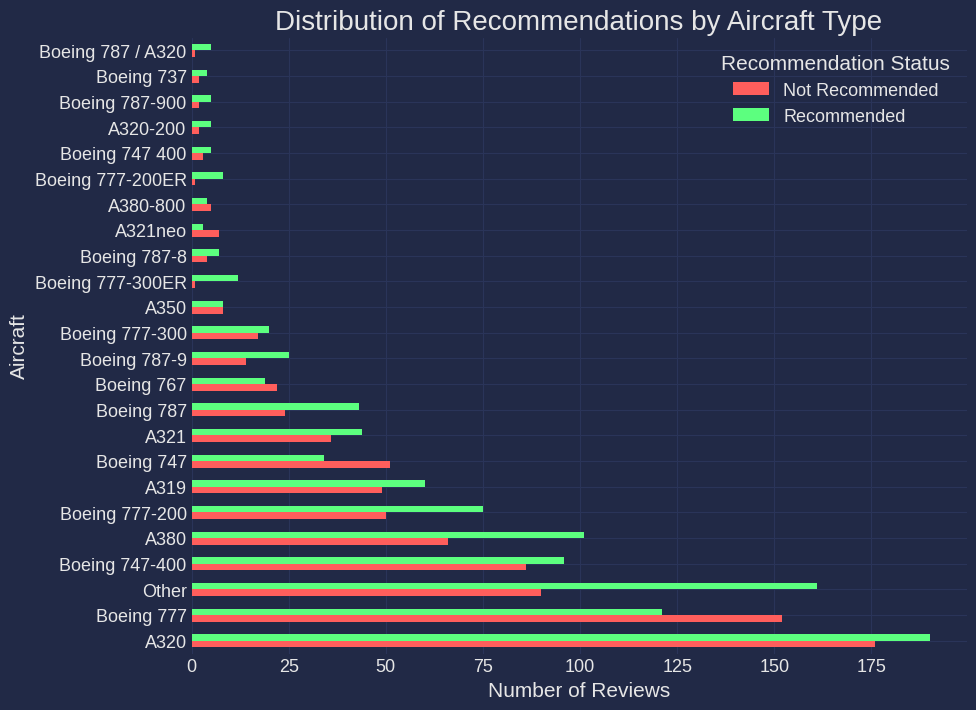

In [80]:
# Plot a horizontal bar chart with red and green bars
ax = recommendation_counts.plot(kind='barh', color=['#ff5e5c', '#5cff7f'], figsize=(10, 8))

# Set labels and title with increased font size
ax.set_xlabel('Number of Reviews', fontsize=15)
ax.set_ylabel('Aircraft', fontsize=15)
ax.set_title('Distribution of Recommendations by Aircraft Type', fontsize=20)
ax.tick_params(axis='both', labelsize=13)

# Set the legend title and labels, move legend to bottom left with increased font size
legend_labels = ['Not Recommended', 'Recommended']
legend_title = 'Recommendation Status'

plt.legend(legend_labels, title=legend_title, loc='upper right', fontsize=13, title_fontsize=15)

plt.show()

# Drop the temporary 'aircraft_group' column to not affect the original DataFrame
df = df.drop('aircraft_group', axis=1)

In [81]:
# Convert 'Yes' and 'No' to 1 and 0
df['recommended'] = df['recommended'].map({'Yes': 1, 'No': 0})

# Filter out rows where 'aircraft' is None
df = df[df['aircraft'].notna()]

# Calculate the score for each aircraft type
scores = df.groupby('aircraft')['recommended'].agg(['sum', 'count'])

# Calculate the 'score' based on the difference between 'Yes' and 'No' recommendations
scores['score'] = scores['sum'] - (scores['count'] - scores['sum'])
scores['score'] = scores['score'].clip(lower=0)  # Replace negative values with zero

# Sort by score in descending order
scores = scores.sort_values(by='score', ascending=False)

# Take the top 10 aircraft types
top_10_scores = scores.head(10)
print(top_10_scores)

                  sum  count  score
aircraft                           
A380              101    167     35
Boeing 777-200     75    125     25
Boeing 787         43     67     19
A320              190    366     14
Boeing 777-300ER   12     13     11
A319               60    109     11
Boeing 787-9       25     39     11
Boeing 747-400     96    182     10
A321               44     80      8
Boeing 777-200ER    8      9      7


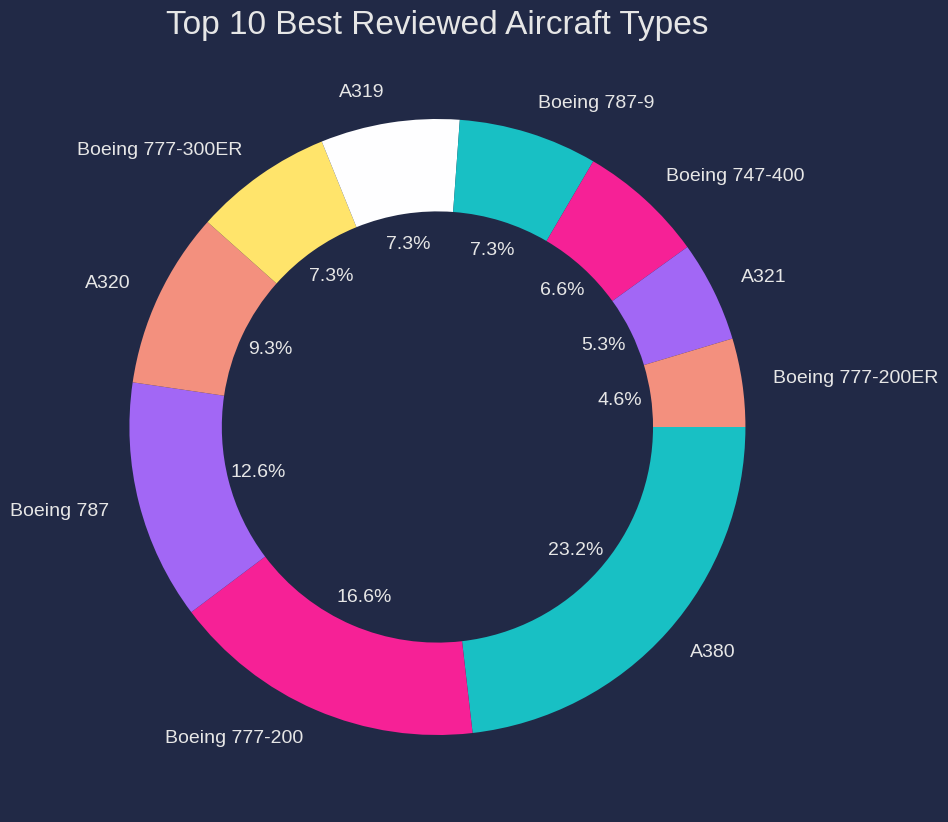

In [82]:
# Plot a pie chart for the top 10 aircraft types
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top_10_scores['score'], labels=top_10_scores.index, autopct='%1.1f%%', counterclock=False, wedgeprops=dict(width=0.3), textprops = {'fontsize': 14})
ax.set_title('Top 10 Best Reviewed Aircraft Types',  fontsize=24)

plt.show()

In [83]:
import numpy as np

# Filter rows where the flight was not recommended
not_recommended_df = df[df['recommended'] == 0]

# Filter rows where the flight was recommended
recommended_df = df[df['recommended'] == 1]

# List of rating categories
rating_categories = ['seat_comfort', 'cabin_service', 'food_beverages', 'entertainment', 'ground_service', 'wifi', 'value_for_money']

# Dictionary to map column names to custom titles
custom_titles = {
    'seat_comfort': 'Seat Comfort',
    'cabin_service': 'Cabin Staff Service',
    'food_beverages': 'Food & Beverages',
    'entertainment': 'Inflight Entertainment',
    'ground_service': 'Ground Service',
    'wifi': 'Wifi & Connectivity',
    'value_for_money': 'Value for Money'
}

# Determine the number of subplots needed
num_categories = len(rating_categories)

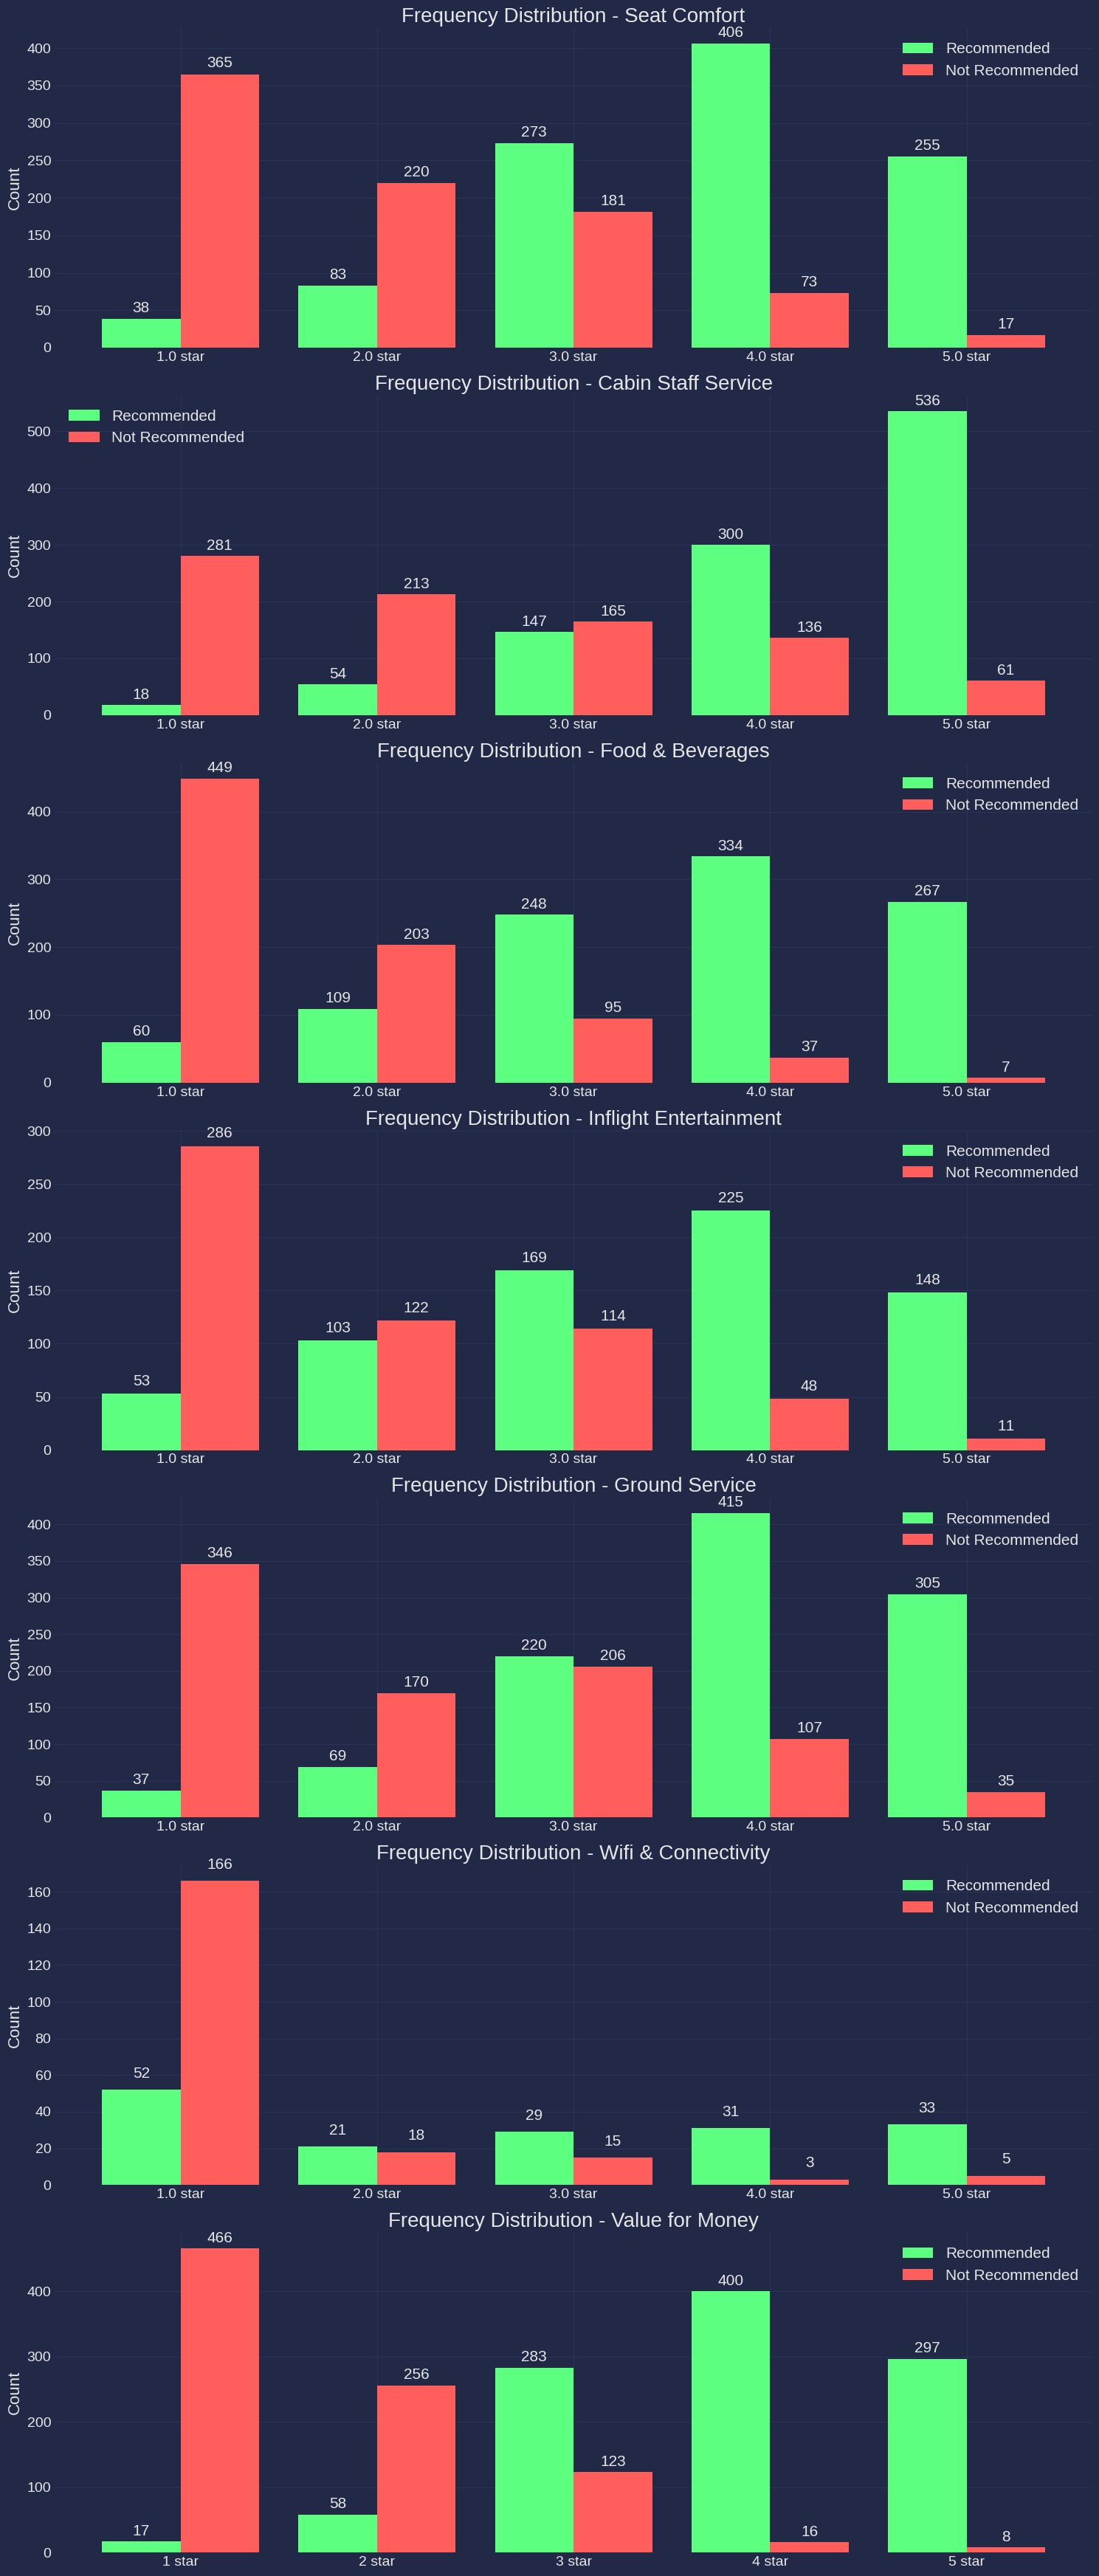

In [84]:
# Create subplots dynamically
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 5 * num_categories))
plt.subplots_adjust(hspace=0.5)

# Loop through each rating category
for i, category in enumerate(rating_categories):
    # Frequency distribution for both recommended and not recommended
    recommended_counts = recommended_df[category].value_counts().sort_index()
    not_recommended_counts = not_recommended_df[category].value_counts().sort_index()

    # Plot for both recommended and not recommended in the same chart
    ax = axes[i]
    width = 0.4  # Width of the bars
    x = np.arange(len(recommended_counts))

    ax.bar(x - width/2, recommended_counts, width=width, color='#5cff7f', label='Recommended')
    ax.bar(x + width/2, not_recommended_counts, width=width, color='#ff5e5c', label='Not Recommended')

    ax.set_title(f'Frequency Distribution - {custom_titles[category]}', fontsize=20)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels([f'{star} star' for star in recommended_counts.index.astype(str)])

    # Display counts of recommended and not recommended
    for idx, count in enumerate(recommended_counts):
        ax.text(idx - width/2, count + 5, str(count), ha='center', va='bottom', fontsize=15)

    for idx, count in enumerate(not_recommended_counts):
        ax.text(idx + width/2, count + 5, str(count), ha='center', va='bottom', fontsize=15)

    ax.legend(fontsize=15)

    # Increase font size for tick labels
    ax.tick_params(axis='both', labelsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In [85]:
df = df.dropna(subset=['date_flown'])

# Convert 'date_flown' to datetime format
df['date_flown'] = pd.to_datetime(df['date_flown'], format='%B %Y')

df['month'] = df['date_flown'].dt.month_name()
df['year'] = df['date_flown'].dt.year

# Group by year, month, and recommended
grouped_data = df.groupby(['year', 'month', 'recommended']).size().unstack(fill_value=0).reset_index()

# Calculate total count of items (recommended + not recommended) for each month
grouped_data['total_count'] = grouped_data[0] + grouped_data[1]

<ipython-input-85-2084edd0f690>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_flown'] = pd.to_datetime(df['date_flown'], format='%B %Y')
<ipython-input-85-2084edd0f690>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date_flown'].dt.month_name()
<ipython-input-85-2084edd0f690>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

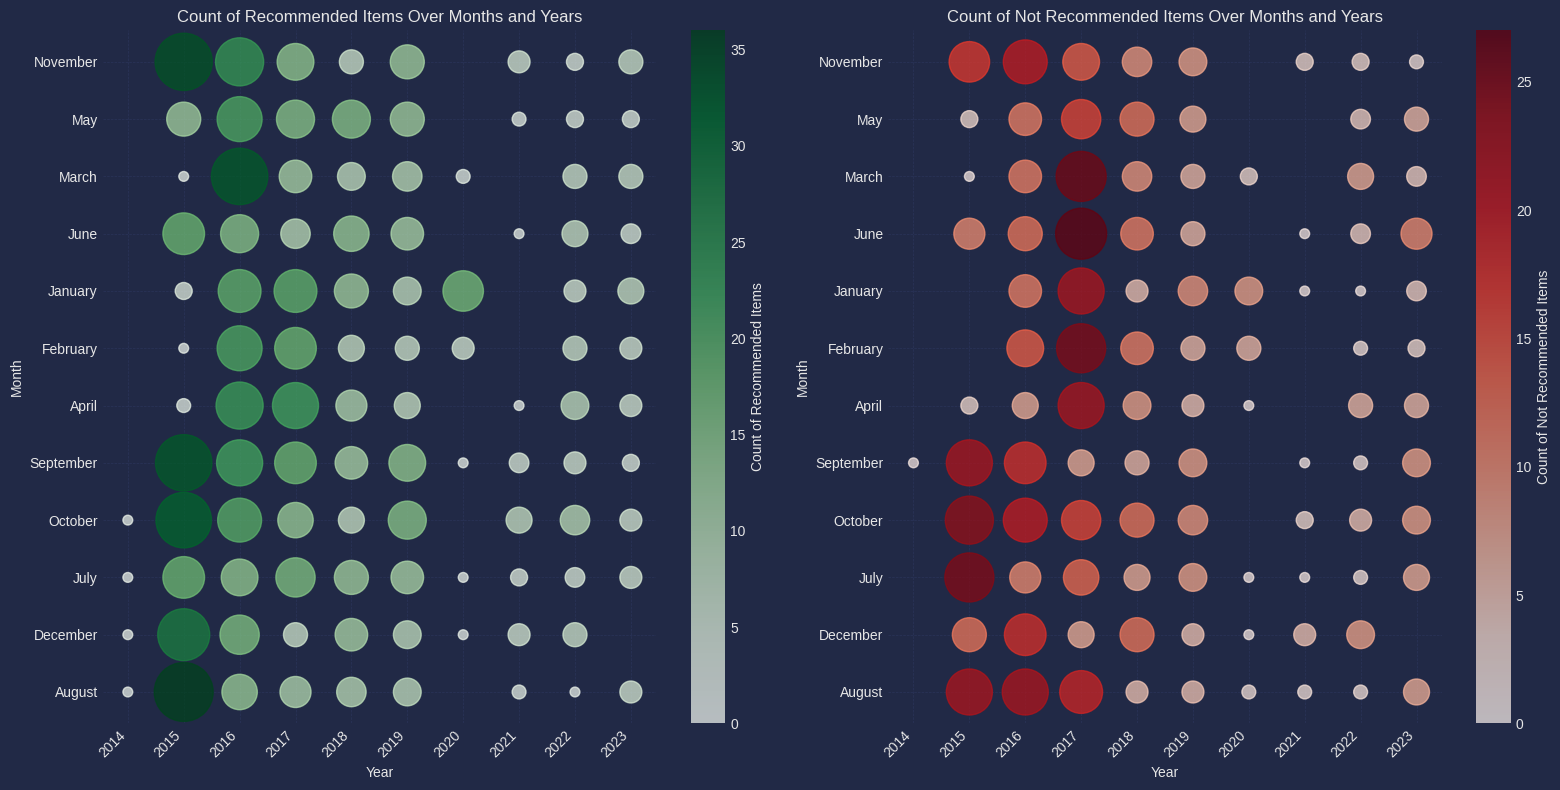

In [86]:
# Set up the bubble chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot with bubble size representing the count of recommended items - Green Color
scatter1 = ax1.scatter(
    grouped_data['year'],
    grouped_data['month'],
    s=grouped_data[1] * 50,  # Scale up for better visibility, assuming 1 is recommended
    c=grouped_data[1],  # Color based on recommended
    alpha=0.7,  # Adjust transparency
    cmap='Greens'  # Use a green colormap
)

# Add labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Month')
ax1.set_title('Count of Recommended Items Over Months and Years')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better visibility
ax1.set_xticks(grouped_data['year'].unique())
ax1.set_xticklabels(grouped_data['year'].unique(), rotation=45, ha='right')

# Add colorbar
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Count of Recommended Items')

# Scatter plot with bubble size representing the count of not recommended items - Red Color
scatter2 = ax2.scatter(
    grouped_data['year'],
    grouped_data['month'],
    s=grouped_data[0] * 50,  # Scale up for better visibility, assuming 0 is not recommended
    c=grouped_data[0],  # Color based on not recommended
    alpha=0.7,  # Adjust transparency
    cmap='Reds'  # Use a red colormap
)

# Add labels and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Month')
ax2.set_title('Count of Not Recommended Items Over Months and Years')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better visibility
ax2.set_xticks(grouped_data['year'].unique())
ax2.set_xticklabels(grouped_data['year'].unique(), rotation=45, ha='right')

# Add colorbar
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Count of Not Recommended Items')

# Show the plot
plt.tight_layout()
plt.show()

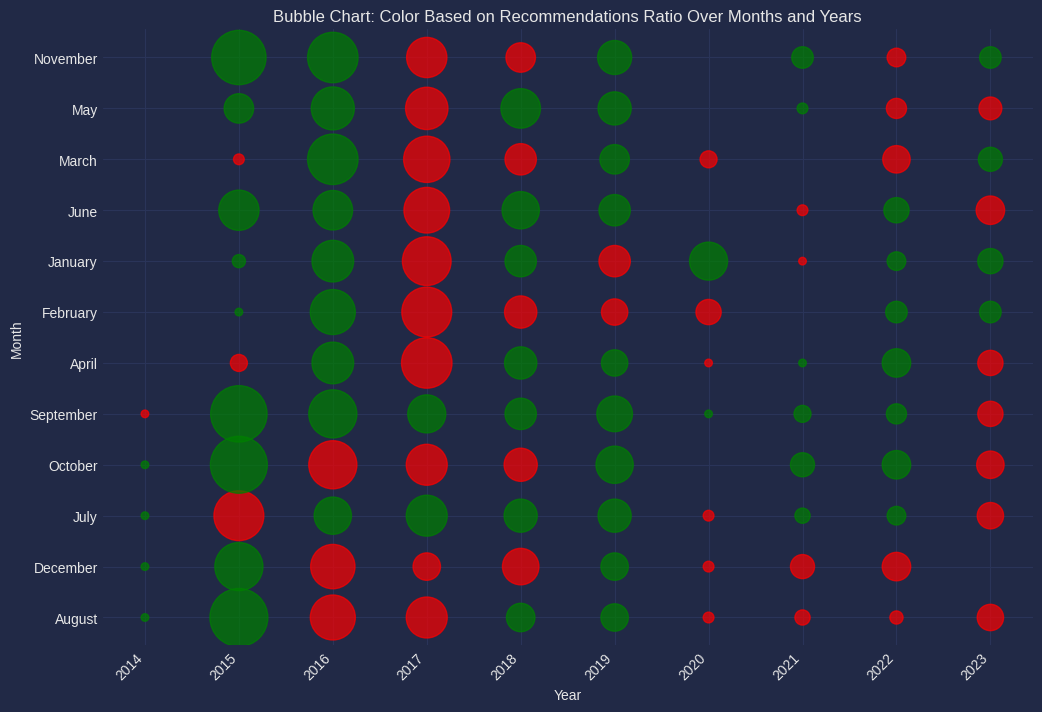

In [87]:
# Set up the bubble chart
fig, ax = plt.subplots(figsize=(12, 8))

# Determine the color based on the ratio of recommendations to non-recommendations
colors = np.where(grouped_data[1] > grouped_data[0], 'green', 'red')

# Scatter plot with bubble size representing the count of recommended items
scatter = ax.scatter(
    grouped_data['year'],
    grouped_data['month'],
    s=(grouped_data[1] + grouped_data[0]) * 30,  # Scale up for better visibility
    c=colors,  # Color based on the ratio
    alpha=0.7,  # Adjust transparency
)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Bubble Chart: Color Based on Recommendations Ratio Over Months and Years')

# Rotate x-axis labels for better visibility
ax.set_xticks(grouped_data['year'].unique())
ax.set_xticklabels(grouped_data['year'].unique(), rotation=45, ha='right')

# Show the plot
plt.show()

In [88]:
# Filter rows for the year 2017
df_2017 = df[df['year'] == 2017]

# Filter rows for the year 2023
df_2023 = df[df['year'] == 2023]

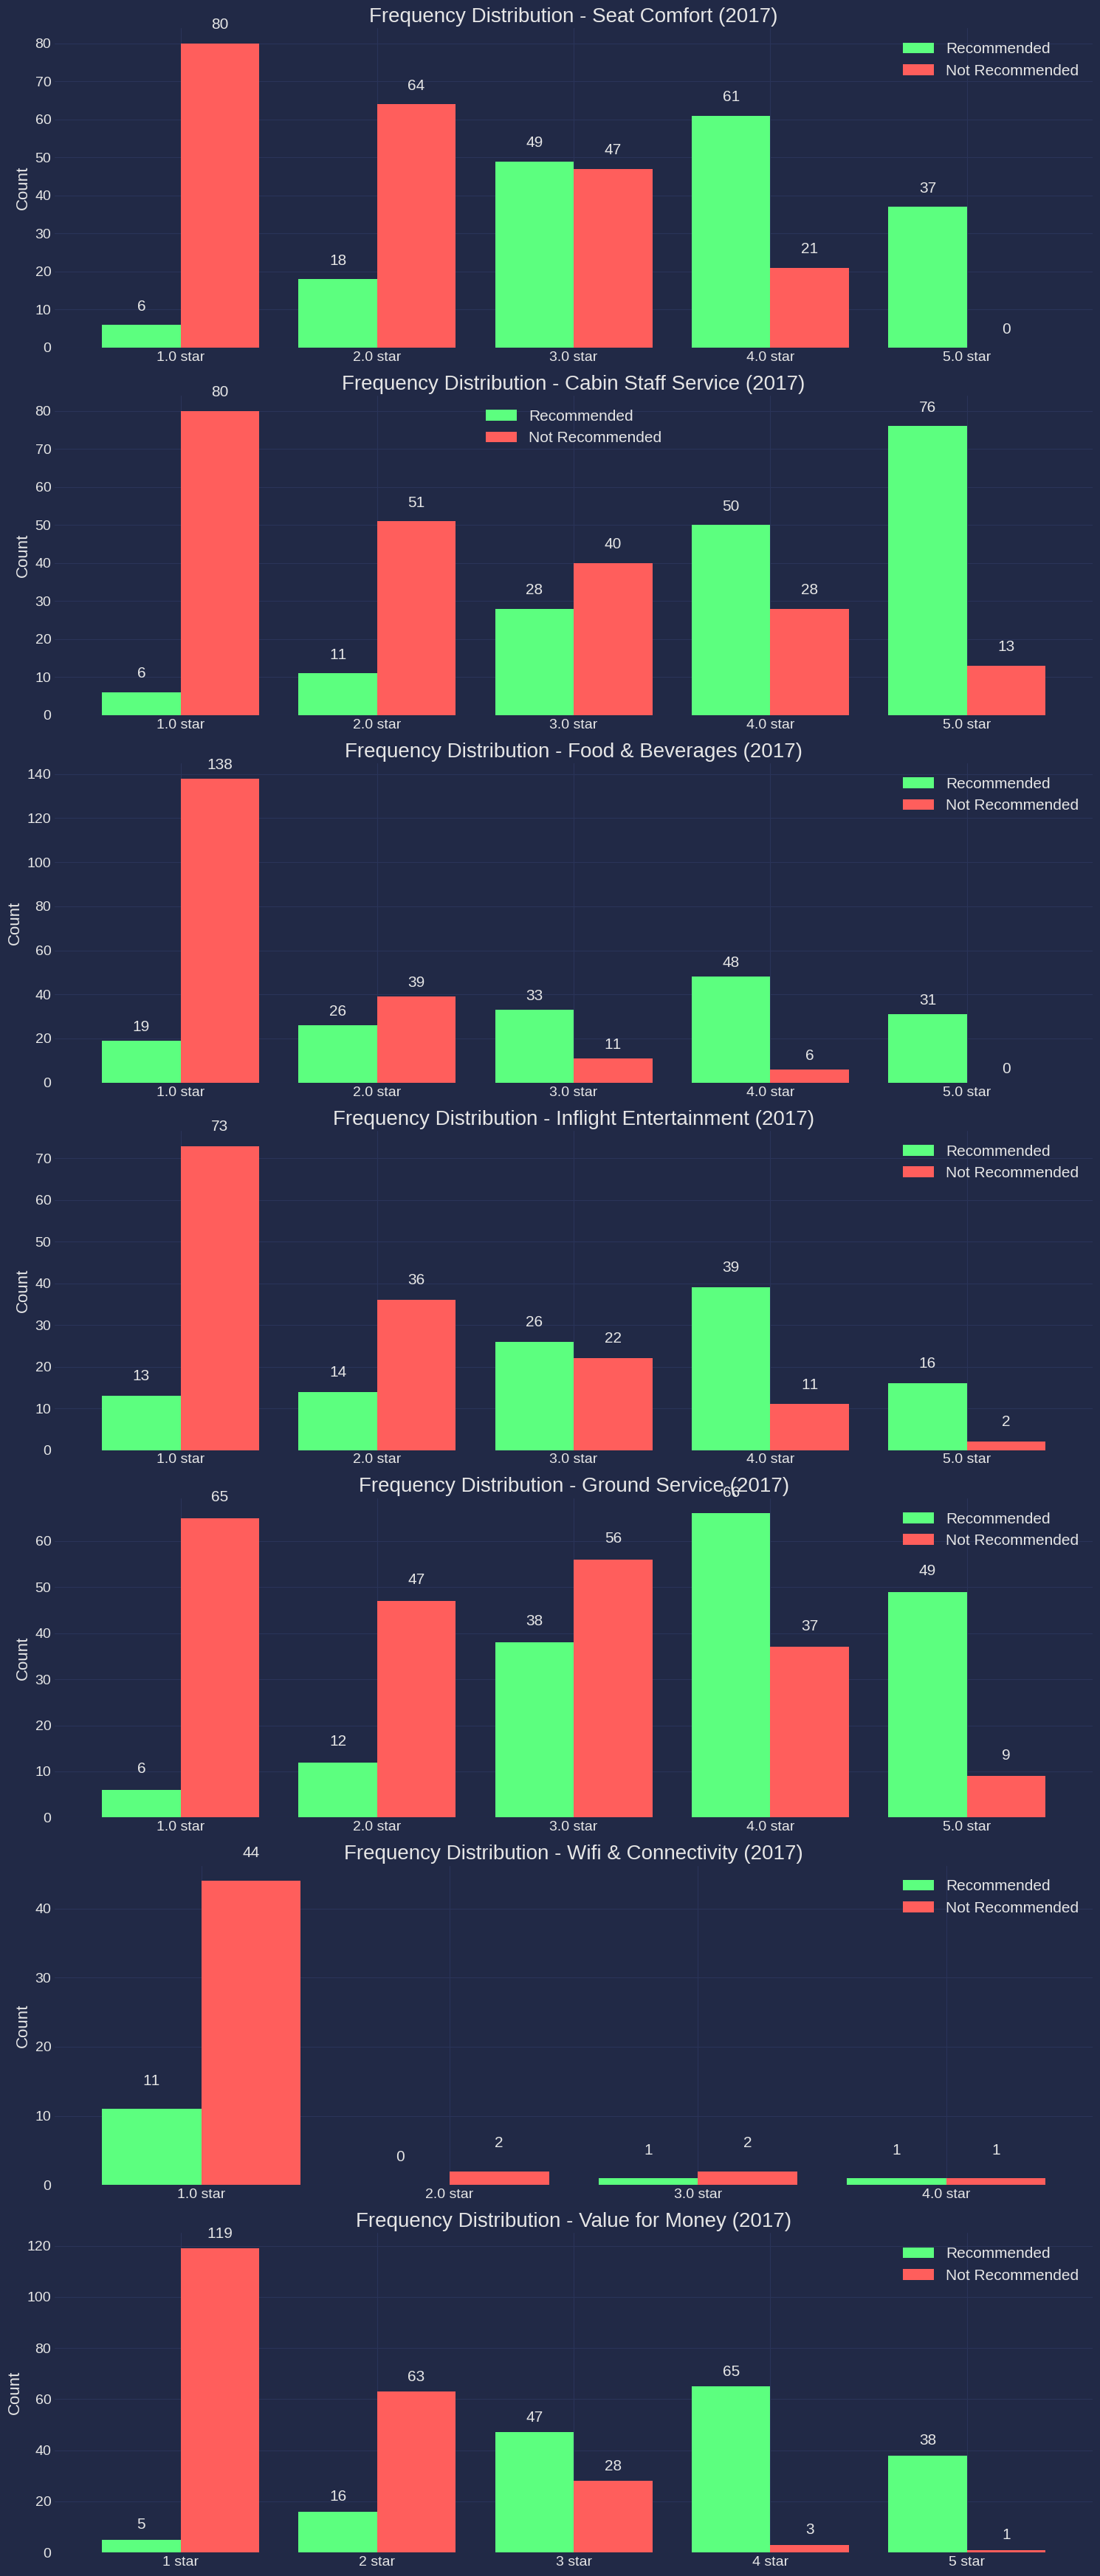

In [89]:
# Create subplots dynamically for 2017
fig, axes_2017 = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 5 * num_categories))
plt.subplots_adjust(hspace=0.5)

# Loop through each rating category for 2017
for i, category in enumerate(rating_categories):
    # Replace NaN with 0 for both recommended and not recommended counts
    recommended_counts_2017 = df_2017[df_2017['recommended'] == 1][category].value_counts().fillna(0)
    not_recommended_counts_2017 = df_2017[df_2017['recommended'] == 0][category].value_counts().fillna(0)

    # Replace NaN with 0 in unique values and exclude 0
    unique_values_2017 = df_2017[category].fillna(0).unique()
    unique_values_2017 = unique_values_2017[unique_values_2017 != 0]
    # Sort unique values in ascending order
    unique_values_2017 = np.sort(unique_values_2017)

    # Plot for both recommended and not recommended in the same chart for 2017
    ax = axes_2017[i]
    width = 0.4  # Width of the bars
    x = np.arange(len(unique_values_2017))

    # Plotting recommended counts
    ax.bar(x - width/2, recommended_counts_2017.reindex(unique_values_2017, fill_value=0), width=width, color='#5cff7f', label='Recommended')

    # Plotting not recommended counts
    ax.bar(x + width/2, not_recommended_counts_2017.reindex(unique_values_2017, fill_value=0), width=width, color='#ff5e5c', label='Not Recommended')

    ax.set_title(f'Frequency Distribution - {custom_titles[category]} (2017)', fontsize=20)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels([f'{star} star' for star in unique_values_2017])

    # Display counts of recommended and not recommended for 2017
    for idx, count in enumerate(recommended_counts_2017.reindex(unique_values_2017, fill_value=0)):
        ax.text(idx - width/2, count + 3, str(count), ha='center', va='bottom', fontsize=15)

    for idx, count in enumerate(not_recommended_counts_2017.reindex(unique_values_2017, fill_value=0)):
        ax.text(idx + width/2, count + 3, str(count), ha='center', va='bottom', fontsize=15)

    ax.legend(fontsize=15)

    # Increase font size for tick labels
    ax.tick_params(axis='both', labelsize=14)

# Adjust layout for 2017
plt.tight_layout()
plt.show()

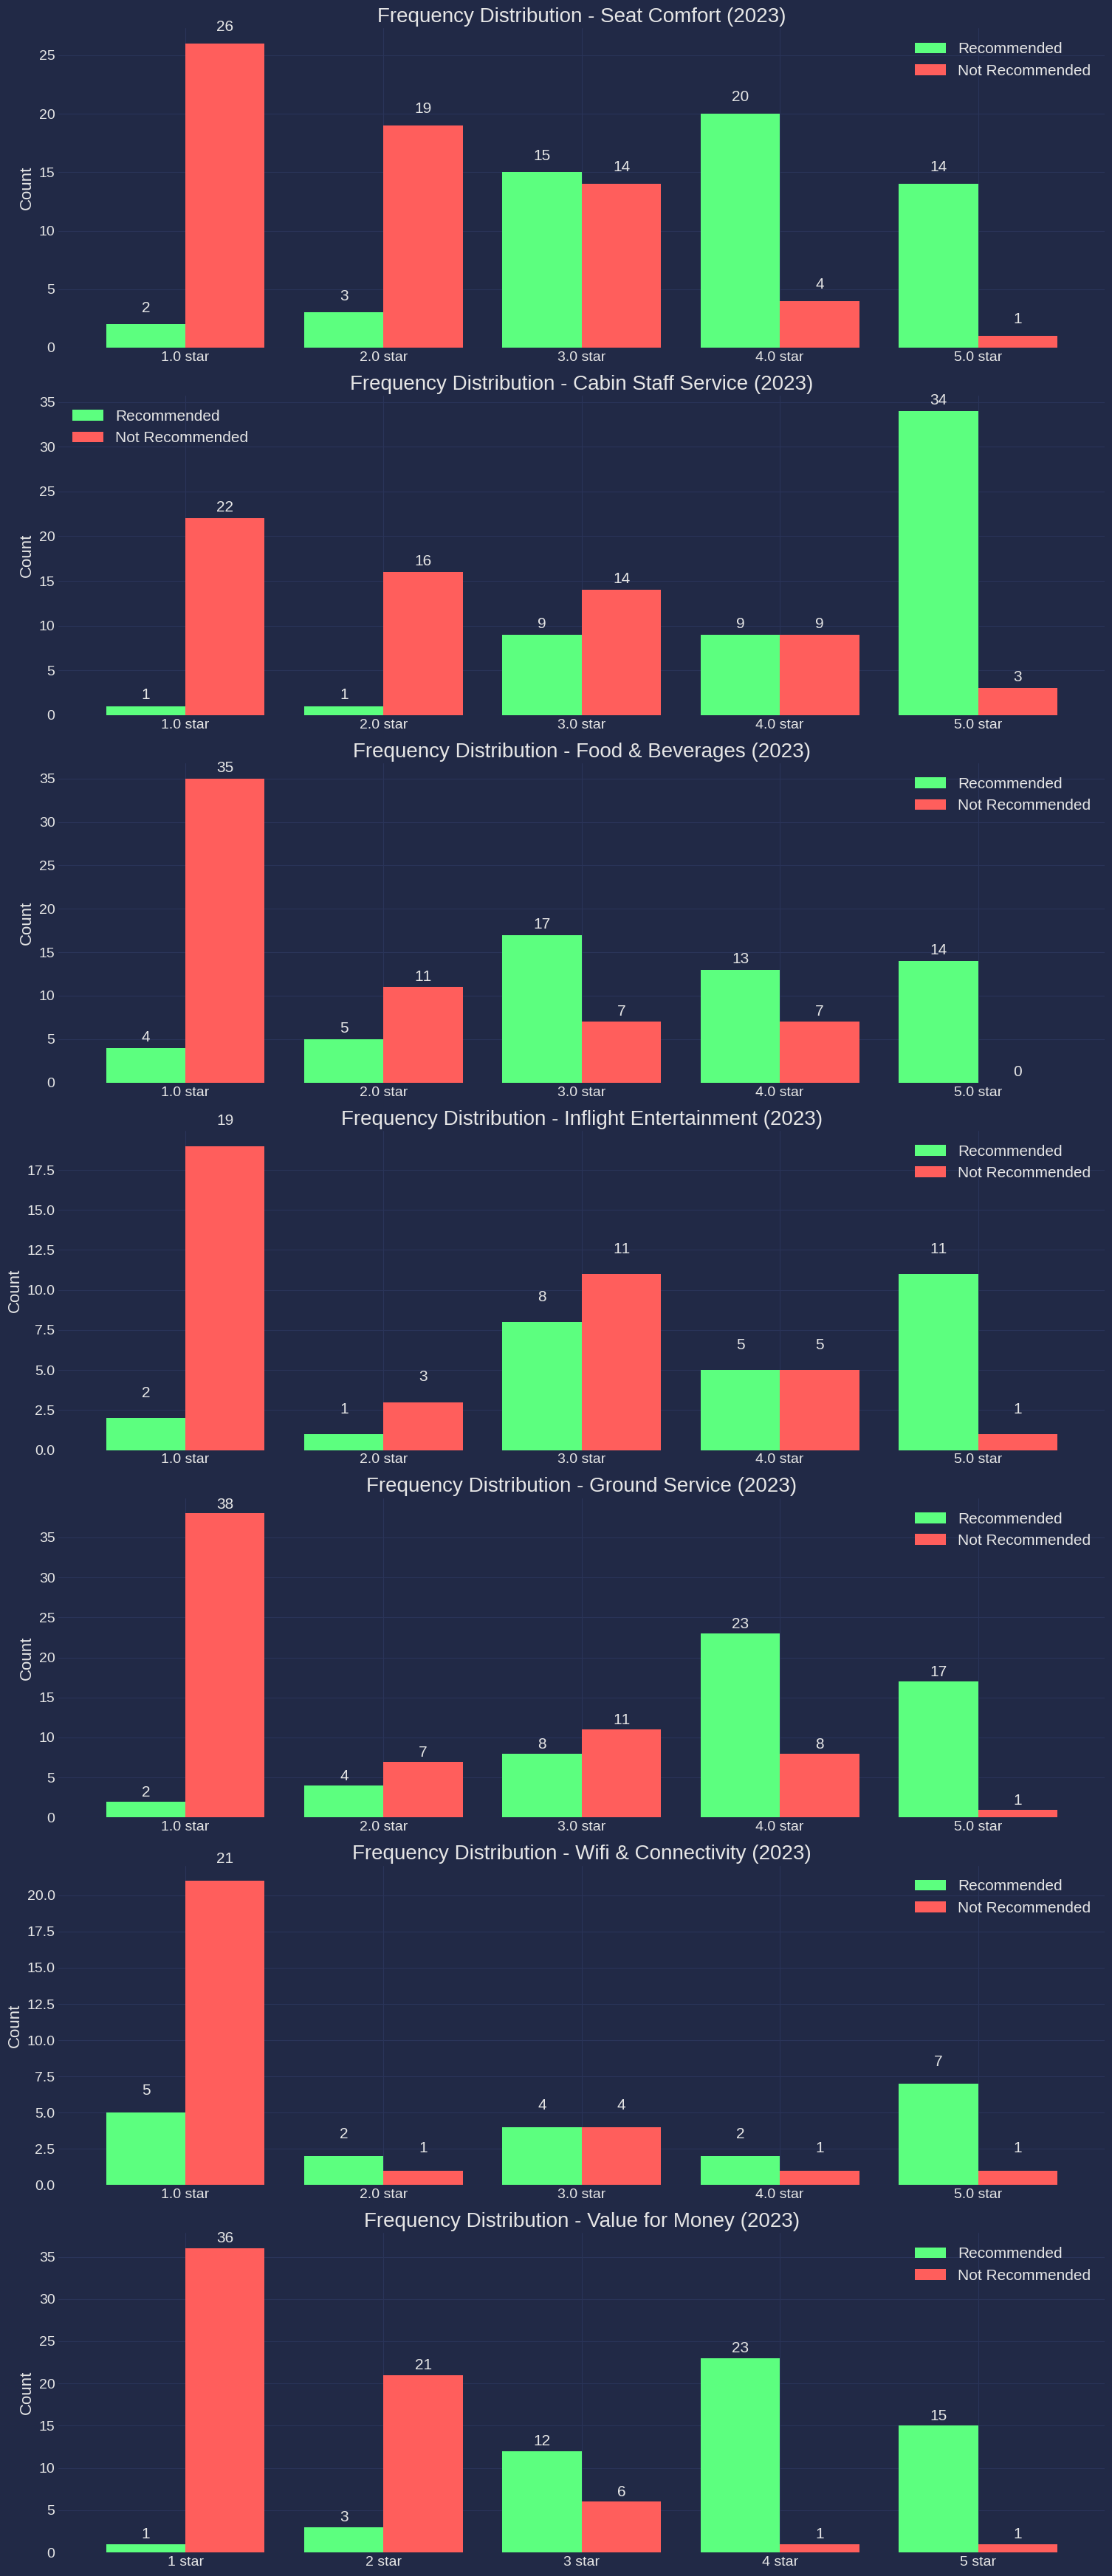

In [90]:
# Create subplots dynamically for 2023
fig, axes_2023 = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 5 * num_categories))
plt.subplots_adjust(hspace=0.5)

# Loop through each rating category for 2023
for i, category in enumerate(rating_categories):
    # Replace NaN with 0 for both recommended and not recommended counts
    recommended_counts_2023 = df_2023[df_2023['recommended'] == 1][category].value_counts().fillna(0)
    not_recommended_counts_2023 = df_2023[df_2023['recommended'] == 0][category].value_counts().fillna(0)

    # Replace NaN with 0 in unique values and exclude 0
    unique_values_2023 = df_2023[category].fillna(0).unique()
    unique_values_2023 = unique_values_2023[unique_values_2023 != 0]

     # Sort unique values in ascending order
    unique_values_2023 = np.sort(unique_values_2023)

    # Plot for both recommended and not recommended in the same chart for 2023
    ax = axes_2023[i]
    width = 0.4  # Width of the bars
    x = np.arange(len(unique_values_2023))

    # Plotting recommended counts
    ax.bar(x - width/2, recommended_counts_2023.reindex(unique_values_2023, fill_value=0), width=width, color='#5cff7f', label='Recommended')

    # Plotting not recommended counts
    ax.bar(x + width/2, not_recommended_counts_2023.reindex(unique_values_2023, fill_value=0), width=width, color='#ff5e5c', label='Not Recommended')

    ax.set_title(f'Frequency Distribution - {custom_titles[category]} (2023)', fontsize=20)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels([f'{star} star' for star in unique_values_2023])

    # Display counts of recommended and not recommended for 2023
    for idx, count in enumerate(recommended_counts_2023.reindex(unique_values_2023, fill_value=0)):
        ax.text(idx - width/2, count + 2, str(count), ha='center', va='top', fontsize=15)

    for idx, count in enumerate(not_recommended_counts_2023.reindex(unique_values_2023, fill_value=0)):
        ax.text(idx + width/2, count + 2, str(count), ha='center', va='top', fontsize=15)

    ax.legend(fontsize=15)

    # Increase font size for tick labels
    ax.tick_params(axis='both', labelsize=14)

# Adjust layout for 2023
plt.tight_layout()
plt.show()

In [100]:
#df.info()
#df['year'].unique()
df['seat_type'].value_counts()
#df.head()
#print(df['recommended'].unique())

Economy Class      876
Business Class     705
Premium Economy    190
First Class        146
Name: seat_type, dtype: int64

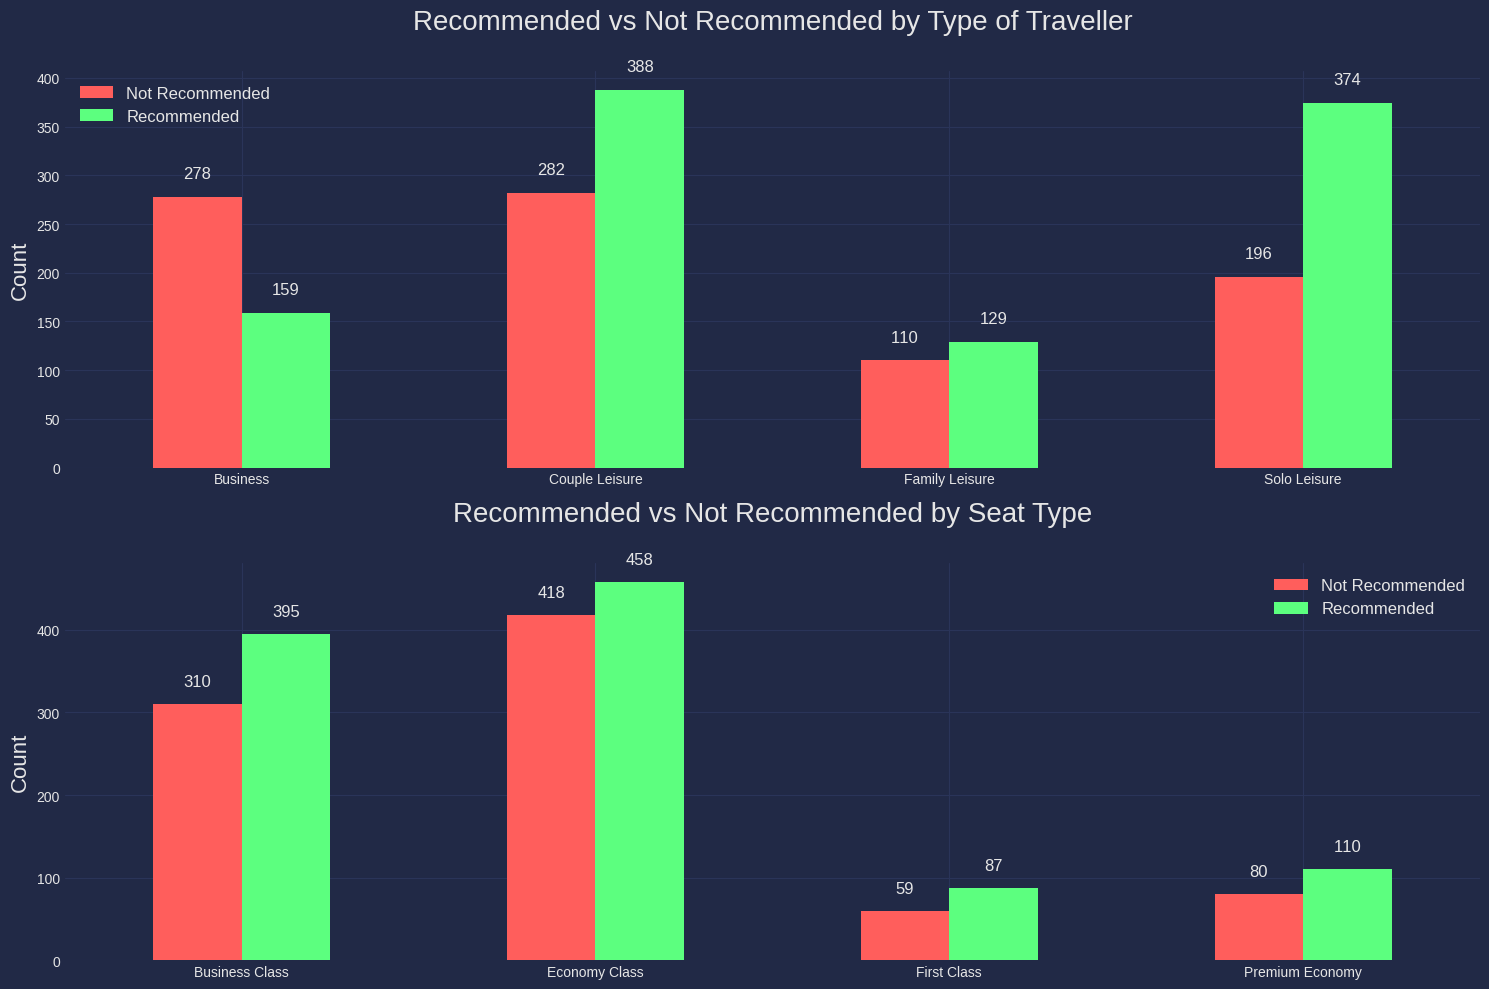

In [103]:
# Set up subplots for 'type_of_traveller' and 'seat_type'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)  # Increase space between title and columns

# Function to add count labels on top of each bar
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Bar chart for 'type_of_traveller'
ax1 = df['recommended'].groupby(df['type_of_traveller']).value_counts().unstack().plot(kind='bar', color=['#ff5e5c', '#5cff7f'], ax=axes[0])
axes[0].set_title('Recommended vs Not Recommended by Type of Traveller', fontsize=20, pad=30)  # Add padding to title
axes[0].set_ylabel('Count', fontsize=16)
axes[0].legend(['Not Recommended', 'Recommended'], loc='upper left', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('')  # Remove x-axis title
add_count_labels(ax1)

# Bar chart for 'seat_type'
ax2 = df['recommended'].groupby(df['seat_type']).value_counts().unstack().plot(kind='bar', color=['#ff5e5c', '#5cff7f'], ax=axes[1])
axes[1].set_title('Recommended vs Not Recommended by Seat Type', fontsize=20, pad=30)  # Add padding to title
axes[1].set_ylabel('Count', fontsize=16)
axes[1].legend(['Not Recommended', 'Recommended'], loc='upper right', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_xlabel('')  # Remove x-axis title
add_count_labels(ax2)

# Show the plots
plt.tight_layout()
plt.show()